<a href="https://colab.research.google.com/github/AdeWealthh/Cancer_Dataser/blob/main/Cancer_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer - Analysis & Visualization**

Breast cancer remains the most common cancer in women around the world and is the leading cause of cancer death in women. The prevalence of breast cancer and its impact on women's health underscores the importance of research and analysis to improve our understanding of the disease. This presentation covers the analysis of breast cancer data using Python. It explores different aspects of the data, including patients' age, cancer stages, survival status, and regional lymph nodes examined.

Through data visualization and analysis, we aim to provide insights into the patterns and trends of breast cancer and its impact on patients' lives. Ultimately, the goal is to contribute to the efforts of improving breast cancer diagnosis, treatment, and patient outcomes.



### **Step 1: Importing Required Libraries and Loading the Dataset**

In [ ]:
# Importing necessary libraries
import pandas as pd #for data manipulation
import matplotlib.pyplot as plt #for data visualization
from matplotlib.animation import FuncAnimation
import seaborn as sns #for data visualization
import plotly.express as px #for data visualization and animation
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#Upload the dataset into the Google Colab
from google.colab import files
uploaded = files.upload()

Saving Breast_Cancer.csv to Breast_Cancer.csv


In [ ]:
# Load the dataset into a pandas dataframe
breast_cancer_df = pd.read_csv('Breast_Cancer.csv')

In [ ]:
# Take a quick look at the data by displaying the first five rows of the dataframe and last five rows
breast_cancer_df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [ ]:
breast_cancer_df.tail()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive
4023,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,7,2,100,Alive


### **Step 2: Get Basic Ideas from the Dataset**

In [ ]:
#Check the shape of the dataset. 
breast_cancer_df.shape

(4024, 16)

The output (4024, 16) indicates that the dataset has 4024 rows and 16 columns. This means that there are 4024 observations (patients) and 16 variables (features) in the dataset.

In [ ]:
#To check the range, distribution and summary statistics of each variable
breast_cancer_df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


The describe() function provides a statistical summary of the dataset. It shows the count, mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile, and maximum value of each numerical column in the DataFrame df. The output suggests that the dataset contains 4024 observations, and the patients' ages range from 30 to 69 years, with an average age of approximately 54 years. The Tumor Size ranges from 1 to 140, with an average of 30.5. The average number of Regional Nodes Examined is 14.4, and the average number of positive nodes is 4.2. The patients' average survival months after diagnosis is 71.3, ranging from 1 to 107 months.

In [ ]:
#To check for null or missing values in the dataset
breast_cancer_df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

The result shows that there are no null or missing values in any of the columns.

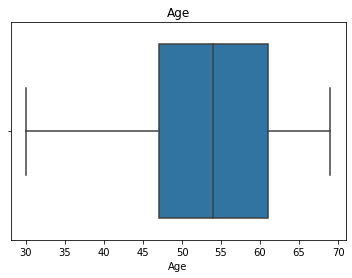

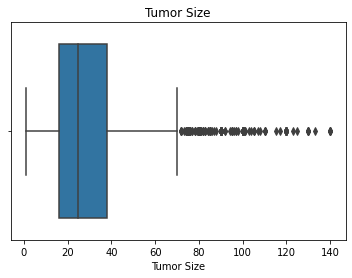

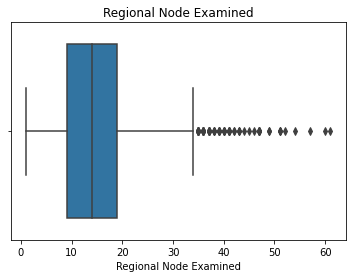

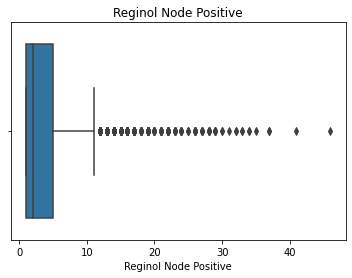

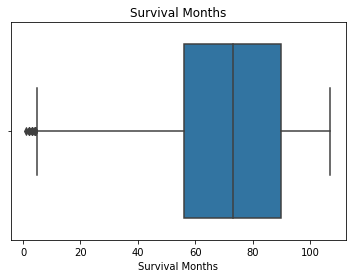

In [ ]:
#Check for outliers in the dataset

# Select the numerical variables
numerical_cols = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']

# Create a boxplot for each numerical variable
for col in numerical_cols:
    plt.figure()
    sns.boxplot(x=breast_cancer_df[col])
    plt.title(col)
    plt.show()

**Age:** The median age of patients in the dataset is 54 years old. The majority of patients are between 40 and 70 years old, with a few patients in their 80s. There are no obvious outliers in this variable.

**Tumor Size:** The median tumor size is around 20 mm. The range of "typical" tumor sizes (between the first and third quartiles) is between about 10 mm and 30 mm. *There are a few outliers with much larger tumor sizes (over 60 mm)*.

**Regional Node Examined:** The median number of regional nodes examined is around 12. There is a wide range of typical values (between about 4 and 20 nodes), with a few patients having many more nodes examined (over 40).

**Regional Node Positive:** The median number of regional nodes that tested positive for cancer is 0. There is a wide range of typical values (between 0 and 3 positive nodes), with a few patients having many more positive nodes (up to 25).

**Survival Months:** The median survival time is around 60 months. The range of "typical" survival times (between the first and third quartiles) is between about 35 and 95 months. *There are a few outliers with much longer survival times (over 150 months)*.

<AxesSubplot:>

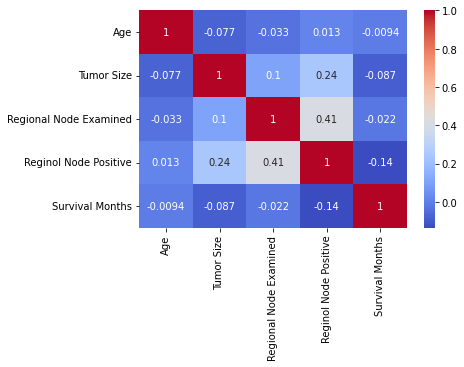

In [ ]:
#Check for correlations between variables using heat map

# Create a correlation matrix. A correlation matrix is a table that shows the correlation coefficients between a set of variables.
corr_matrix = breast_cancer_df.corr()

# Create a heatmap of the correlation matrix. 
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

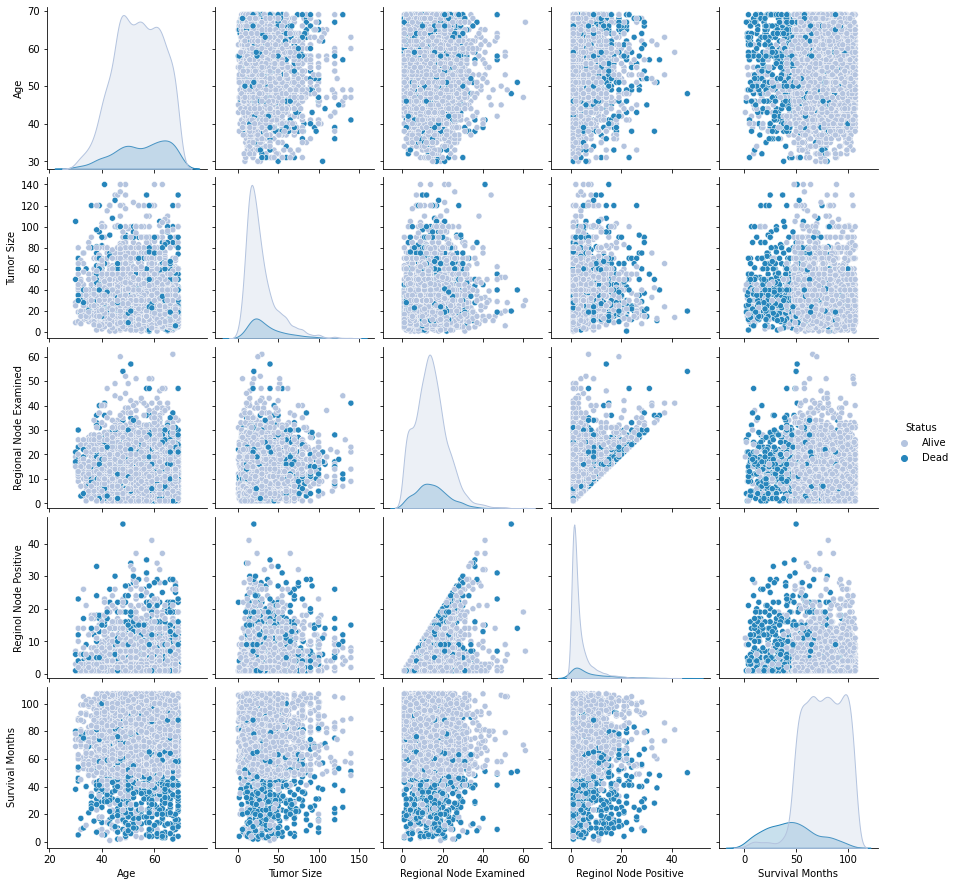

In [ ]:
plt.rcParams['font.size']= 10
sns.pairplot(breast_cancer_df,hue='Status', palette='PuBu')

# **Data Cleaning**

In [ ]:
#Find unique value in the Grade Columns
breast_cancer_df.Grade.unique()

array(['3', '2', '1', ' anaplastic; Grade IV'], dtype=object)

# **Data Visualization**

### `**Distribution of Ages of Women with Breast Cancer**`

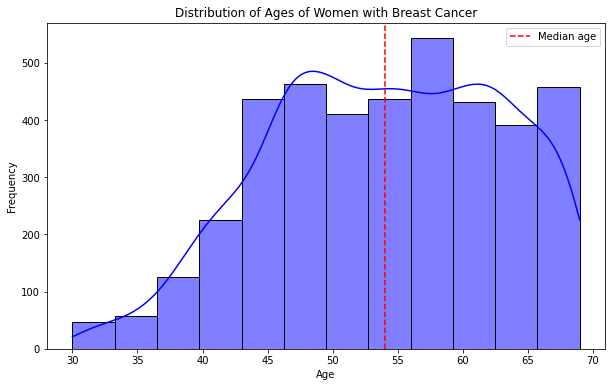

In [ ]:
# Create distplot with median line
plt.figure(figsize=(10, 6))
sns.histplot(data=breast_cancer_df, bins=12, color='blue', kde=True, x='Age')
plt.axvline(breast_cancer_df['Age'].median(), color='red', linestyle='--', label='Median age')

# Set plot labels
plt.title('Distribution of Ages of Women with Breast Cancer')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

#Show plot
plt.show()

In [ ]:
#To replace the value "anaplastic; Grade IV" with "4" in the "Grade" column of the DataFrame 'df'
breast_cancer_df['Grade'] = breast_cancer_df['Grade'].str.replace("anaplastic; Grade IV",'4')

In [ ]:
#Confirm the result of the replacement
print(breast_cancer_df['Grade'].unique())

['3' '2' '1' ' 4']


In [ ]:
breast_cancer_df['Grade'] = breast_cancer_df['Grade'].astype(int)
breast_cancer_df = breast_cancer_df.sort_values(by='Grade')

**Size of the Tumour based on Grade**

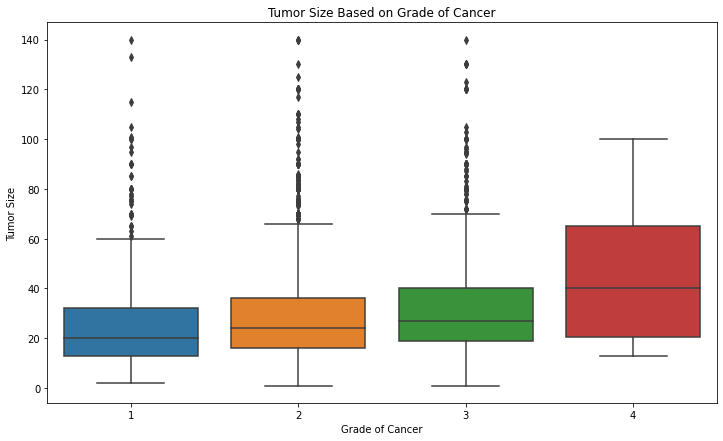

In [ ]:
# create a boxplot of the tumor size based on the grade of the cancer
plt.figure(figsize=(12,7))
sns.boxplot(x='Grade', y='Tumor Size', data=breast_cancer_df)

# add labels and title to the plot
plt.xlabel('Grade of Cancer')
plt.ylabel('Tumor Size')
plt.title('Tumor Size Based on Grade of Cancer')
plt.show()

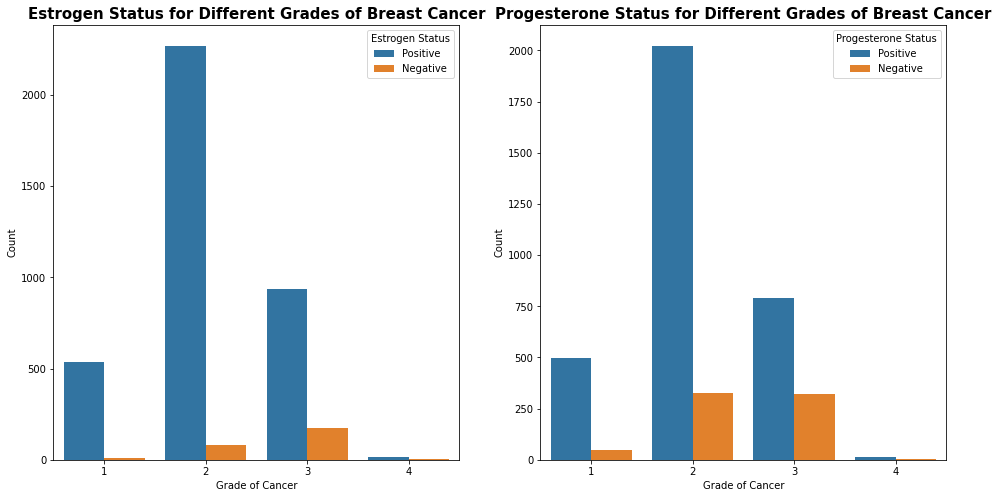

In [ ]:
#Estrogen and Progesterone Status based on Grade on Breast Cancer

# create subplots with two columns
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# plot count of estrogen status for different grades of breast cancer
sns.countplot(breast_cancer_df.Grade, hue=breast_cancer_df['Estrogen Status'], ax=axes[0])
axes[0].set_title("Estrogen Status for Different Grades of Breast Cancer",
                  fontweight="bold", fontdict={'fontsize': 15})
axes[0].set_xlabel("Grade of Cancer")
axes[0].set_ylabel("Count")

# plot count of progesterone status for different grades of breast cancer
sns.countplot(breast_cancer_df.Grade, hue=breast_cancer_df['Progesterone Status'], ax=axes[1])
axes[1].set_title("Progesterone Status for Different Grades of Breast Cancer",
                  fontweight="bold", fontdict={'fontsize': 15})
axes[1].set_xlabel("Grade of Cancer")
axes[1].set_ylabel("Count")

# display the plot
plt.show()



In [ ]:
fig = px.scatter(breast_cancer_df, x="Age", y="Survival Months", animation_frame="Tumor Size",
                 size="Tumor Size", color="Grade", hover_name="Status",
                 log_x=True, range_x=[20, 90], range_y=[0, 200])

fig.update_layout(title="Tumor Sizes for different Ages and Survival Months",
                  xaxis_title="Age", yaxis_title="Survival Months",
                  font=dict(size=10))

fig.show()


Text(0.5, 1.0, 'Tumor Sizes for different Ages and Survival Month')

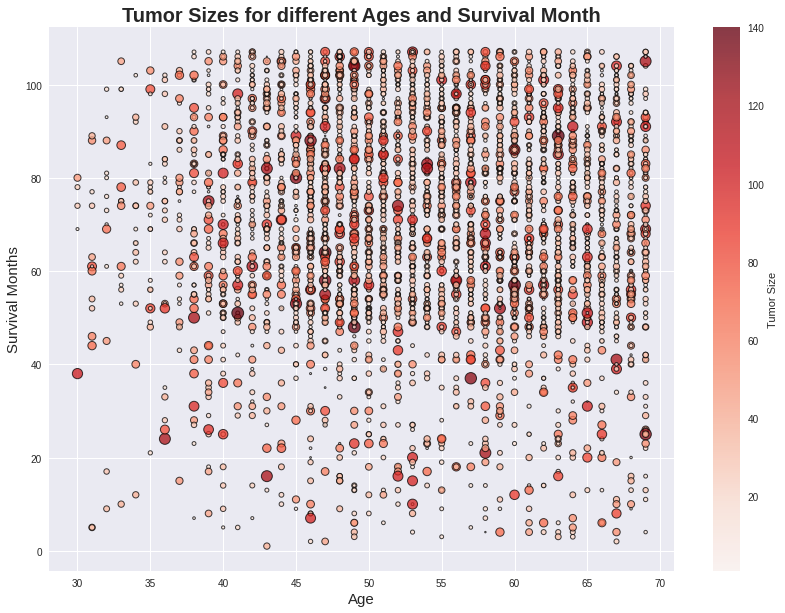

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(14,10))
plt.scatter(breast_cancer_df.Age, breast_cancer_df['Survival Months'], s=breast_cancer_df['Tumor Size'], c=breast_cancer_df['Tumor Size'], edgecolor='k',
            cmap='Reds', alpha=0.75, linewidth=1)
plt.colorbar().set_label('Tumor Size')
plt.xlabel("Age", fontdict={'fontsize': 15})
plt.ylabel("Survival Months", fontdict={'fontsize': 15})
plt.title("Tumor Sizes for different Ages and Survival Month", fontdict={'fontsize': 20}, fontweight="bold")


In [ ]:
#Patient dead or alive based on Differentiation Status

# Filter the data for the two statuses of interest
filtered_df = breast_cancer_df[breast_cancer_df['Status'].isin(['Dead', 'Alive'])]

# Group the data by differentiation status and survival status, and count the number of patients in each group
counts = filtered_df.groupby(['differentiate', 'Status']).size().reset_index(name='count')

# Calculate the percentage of patients for each differentiation status and survival status
total_counts = counts.groupby('differentiate')['count'].transform('sum')
counts['percentage'] = counts['count'] / total_counts * 100

# Create the stacked bar chart
fig = px.bar(counts, x='differentiate', y='percentage', color='Status', 
             title='Patient Survival by Differentiation Status',
             labels={'differentiate': 'Differentiation Status', 'percentage': 'Percentage of Patients'})

# Set the legend title and position
fig.update_layout(legend_title_text='Survival Status', legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

# Show the chart
fig.show()




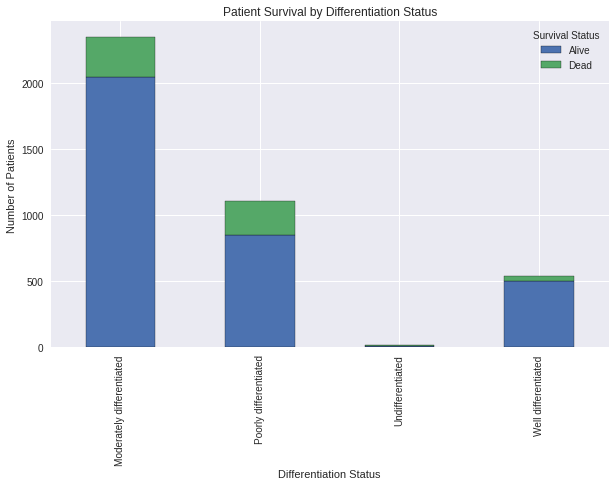

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for the two statuses of interest
filtered_df = breast_cancer_df[breast_cancer_df['Status'].isin(['Dead', 'Alive'])]

# Group the data by differentiation status and survival status, and count the number of patients in each group
counts = filtered_df.groupby(['differentiate', 'Status']).size().reset_index(name='count')

# Pivot the table to create a stacked bar chart
counts_pivot = counts.pivot(index='differentiate', columns='Status', values='count')

# Calculate the percentage of patients for each differentiation status and survival status
total_counts = counts.groupby('differentiate')['count'].transform('sum')
counts['percentage'] = counts['count'] / total_counts * 100

# Create the stacked bar chart
ax = counts_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), edgecolor='k')

# Add x and y labels and a title
ax.set_xlabel('Differentiation Status')
ax.set_ylabel('Number of Patients')
ax.set_title('Patient Survival by Differentiation Status')

# Add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Survival Status')

# Show the chart
plt.show()


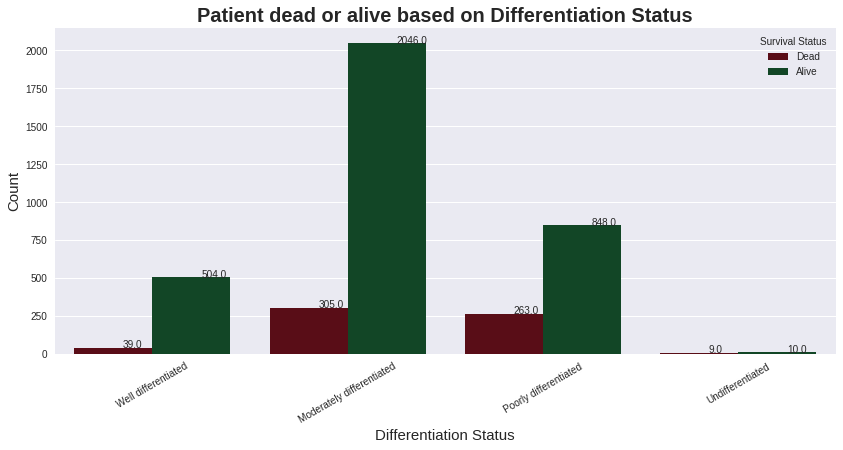

In [ ]:
plt.figure(figsize=(14,6))
ax = sns.countplot(breast_cancer_df['differentiate'], hue=breast_cancer_df['Status'], 
                   palette={'Dead': '#66000d', 'Alive': '#0a4e24'})
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(rotation = 30)
plt.xlabel("Differentiation Status",fontdict={'fontsize': 15})
plt.ylabel("Count",fontdict={'fontsize': 15})
plt.title("Patient dead or alive based on Differentiation Status",fontdict={'fontsize': 20},
          fontweight="bold")
plt.legend(title='Survival Status')
plt.show()
